In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7272727272727273


In [ ]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
  input_data = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]]
  prediction = model.predict(input_data)
  return prediction[0]

In [ ]:
result = predict_diabetes(2, 120, 70, 20, 85, 28.0, 0.5, 25)
print("Prediction:", result)

Prediction: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n, df.columns")

print("n\nBasic statistics (describe):")
display(df.describe())

print("\n\nMissing values per column:")
print(df.isnull().sum())

print("\n\nOutcome value counts (0 = No, 1 = Yes):")
print(df['Outcome'].value_counts())

Shape of dataset: (768, 9)

Columns:
, df.columns
n
Basic statistics (describe):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Outcome value counts (0 = No, 1 = Yes):
Outcome
0    500
1    268
Name: count, dtype: int64


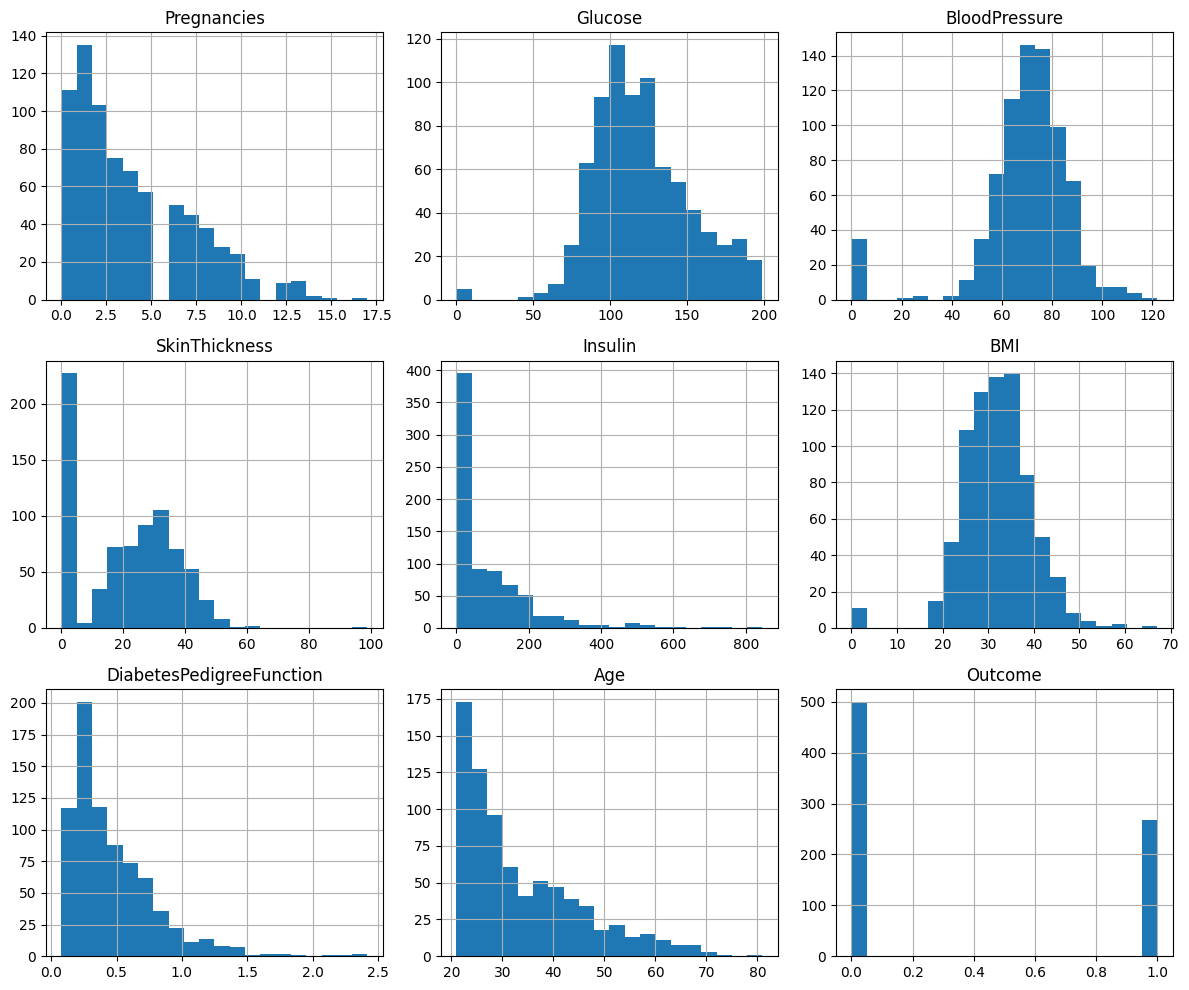

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

cols_to_fix = ['Glucose', "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_clean = df.copy()

for col in cols_to_fix:
  df_clean[col] = df_clean[col].replace(0, np.nan)

for col in cols_to_fix:
  df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_clean.drop("Outcome", axis = 1)
y = df_clean["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc, prec, rec, f1

(0.7402597402597403, 0.631578947368421, 0.6545454545454545, 0.6428571428571429)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[78, 21],
       [19, 36]])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

acc_lr, prec_lr, rec_lr, f1_lr

(0.7532467532467533,
 0.6666666666666666,
 0.6181818181818182,
 0.6415094339622641)

In [ ]:
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

rf_tuned.fit(X_train, y_train)

y_pred_tuned = rf_tuned.predict(X_test)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned)
rec_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

acc_tuned, prec_tuned, rec_tuned, f1_tuned

(0.7532467532467533,
 0.6545454545454545,
 0.6545454545454545,
 0.6545454545454545)

In [ ]:
import joblib

joblib.dump(rf_tuned, "diabetes_model.pkl")

['diabetes_model.pkl']

In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
from google.colab import files

files.download("diabetes_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>